<a href="https://colab.research.google.com/github/Argentan/DMA_LAB2/blob/master/tutoriales/05_valicacion_sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Validación de Modelos

Los algoritmos de aprendizaje automático se entrenan mediante la optimizaicón de una función sobre los datos de entrenamiento. Por ende, no se puede validar la hipótesis aprendida sobre los mismos datos que se usaron para formularla. Si lo hiciéramos, lejos de obtener una métrica adecuada de lo bien que generalizará nuestro modelo, solo tendríamos una evaluación de cuánto se ajusta a los datos de entrenamiento. Cuando ese ajuste es muy fuerte y la generalización es muy mala, se dice que incurrimos en un ajuste excesivo (overfitting).

Exísten métodos que nos permiten estimar cuñanto generalizará un determinado modelo. En primer término, la simple división entre entrenamiento y validación puede dar la primera aproximación. Generalizando esta idea, se llega a la técnica de validación cruzada (cross-validation) que es la división en k subconjuntos disjuntos de entrenamiento y validación. Llevado al extremo, tenemos los métodos de dejar-p-afuera (leave p out), que cuando p=1, implica el entrenamiento de n modelos para precedir en cada uno de los casos, habiendo entrenado en todos los demás.


## Separación simple en entrenamiento y validación

En el tutorial anterior, vimos un ejemplo de tomar un porcentaje p% de casos al azar para validación, entrenando con el restante (1-p)%. Ese fue un caso de simple separación aleatoria entre entrenamiento y validación.

Scikit Learn es una librería que no solo tiene una amplia variedad de algoritmos de aprendizaje automático, sino que provee una gran cantidad de funciones auxiliares para simplificar el tratamiento de los datos, entre ellas, las de validación.


In [53]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
sns.set()

In [55]:
#setup para el notebook
%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [56]:
try:
    data = pd.read_csv("../data/titanic_proc.csv", index_col="PassengerId")
except:
    data = pd.read_csv("https://raw.githubusercontent.com/Argentan/DMA_LAB2/master/data/titanic_proc.csv", index_col="PassengerId")
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.00,1,0,0,7.25,0,1,0,0,1,0
2,1,1,1,38.00,1,0,1,71.28,1,1,1,0,0,0
3,1,3,1,26.00,0,0,2,7.92,0,0,0,0,1,0
4,1,1,1,35.00,1,0,3,53.10,2,1,0,0,1,0
5,0,3,0,35.00,0,0,4,8.05,0,0,0,0,1,0


In [57]:
# Scale numeric data
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = data.select_dtypes(include=['float64']).columns

# Apply StandardScaler
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,,
1,0,3,0,-0.59,1,0,0,-0.50,0,1,0,0,1,0
2,1,1,1,0.64,1,0,1,0.79,1,1,1,0,0,0
3,1,3,1,-0.28,0,0,2,-0.49,0,0,0,0,1,0
4,1,1,1,0.41,1,0,3,0.42,2,1,0,0,1,0
5,0,3,0,0.41,0,0,4,-0.49,0,0,0,0,1,0


Repasamos como se componen los argumentos de las funciones

In [58]:
def test(a, b, c="default"):
    print(a, b, c)

test(**{"a": 1, "b": 2, "c": "no default"})

1 2 no default


Vemos la ayuda de la función `train_test_split`

In [59]:
#model_selection.train_test_split?

In [60]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(data.drop("Survived", axis=1),
                                                                    data.Survived, test_size=0.1, random_state=0)
print(f"X_train: {X_train.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_valid: {y_valid.shape}")

X_train: (801, 13)
X_valid: (90, 13)
y_train: (801,)
y_valid: (90,)


In [61]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,
816,1,0,0.00,0,0,634,-0.65,138,0,0,0,1,1
878,3,0,-0.82,0,0,671,-0.49,0,0,0,0,1,0
194,2,0,-2.05,1,1,137,-0.12,27,2,0,0,1,0
524,1,1,1.10,0,1,290,0.52,63,1,1,0,0,0
635,3,1,-1.59,3,2,62,-0.09,0,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,1,1,0.72,1,1,645,1.03,140,2,1,0,0,0
193,3,1,-0.82,1,0,174,-0.49,0,1,0,0,1,0
630,3,0,0.00,0,0,512,-0.49,0,0,0,1,0,1


In [62]:
print(X_train.head())
y_train.head()

             Pclass  Sex   Age  SibSp  Parch  Ticket  Fare  Cabin  NumFam  C  \
PassengerId                                                                    
816               1    0  0.00      0      0     634 -0.65    138       0  0   
878               3    0 -0.82      0      0     671 -0.49      0       0  0   
194               2    0 -2.05      1      1     137 -0.12     27       2  0   
524               1    1  1.10      0      1     290  0.52     63       1  1   
635               3    1 -1.59      3      2      62 -0.09      0       5  0   

             Q  S  Age_nul  
PassengerId                 
816          0  1        1  
878          0  1        0  
194          0  1        0  
524          0  0        0  
635          0  1        0  


PassengerId
816    0
878    0
194    1
524    1
635    0
Name: Survived, dtype: int64

In [63]:
print(X_valid.head())
y_valid.head()

             Pclass  Sex   Age  SibSp  Parch  Ticket  Fare  Cabin  NumFam  C  \
PassengerId                                                                    
496               3    0  0.00      0      0     111 -0.36      0       0  1   
649               3    0  0.00      0      0     522 -0.50      0       0  0   
279               3    0 -1.75      4      1      16 -0.06      0       5  0   
32                1    1  0.00      1      0      30  2.30      9       1  1   
256               3    1 -0.05      0      2     228 -0.34      0       2  1   

             Q  S  Age_nul  
PassengerId                 
496          0  0        1  
649          0  1        1  
279          1  0        0  
32           0  0        1  
256          0  0        0  


PassengerId
496    0
649    0
279    0
32     1
256    1
Name: Survived, dtype: int64

## Ajuste de Hiperparámetros

Vamos a comenzar ajustando los valores posibles de un parámetro `max_depth` en un modelo de `RandomForestClassifier`

In [64]:
depths = list(range(2, 40, 2)) + [None]
depths

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, None]

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score

Armamos un DF para guardar los resultados

In [66]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["train", "valid"])
res

,train,valid
2,NaN,NaN
4,NaN,NaN
6,NaN,NaN
8,NaN,NaN
10,NaN,NaN
...,...,...
32,NaN,NaN
34,NaN,NaN
36,NaN,NaN
38,NaN,NaN


Luego entrenamos el modelo con los distintos valores del parámetro y vemos como mejora la Entropía cruzada (log loss)

In [67]:
for depth in depths:
    learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
    learner.fit(X_train, y_train)
    res.loc[str(depth), "train"] = log_loss(y_train, learner.predict_proba(X_train))
    res.loc[str(depth), "valid"] = log_loss(y_valid, learner.predict_proba(X_valid))

In [68]:
res

,train,valid
2,0.51,0.50
4,0.42,0.40
6,0.34,0.37
8,0.27,0.39
10,0.20,0.39
...,...,...
32,0.11,0.41
34,0.11,0.42
36,0.11,0.39
38,0.11,0.41


Graficamos el resultado

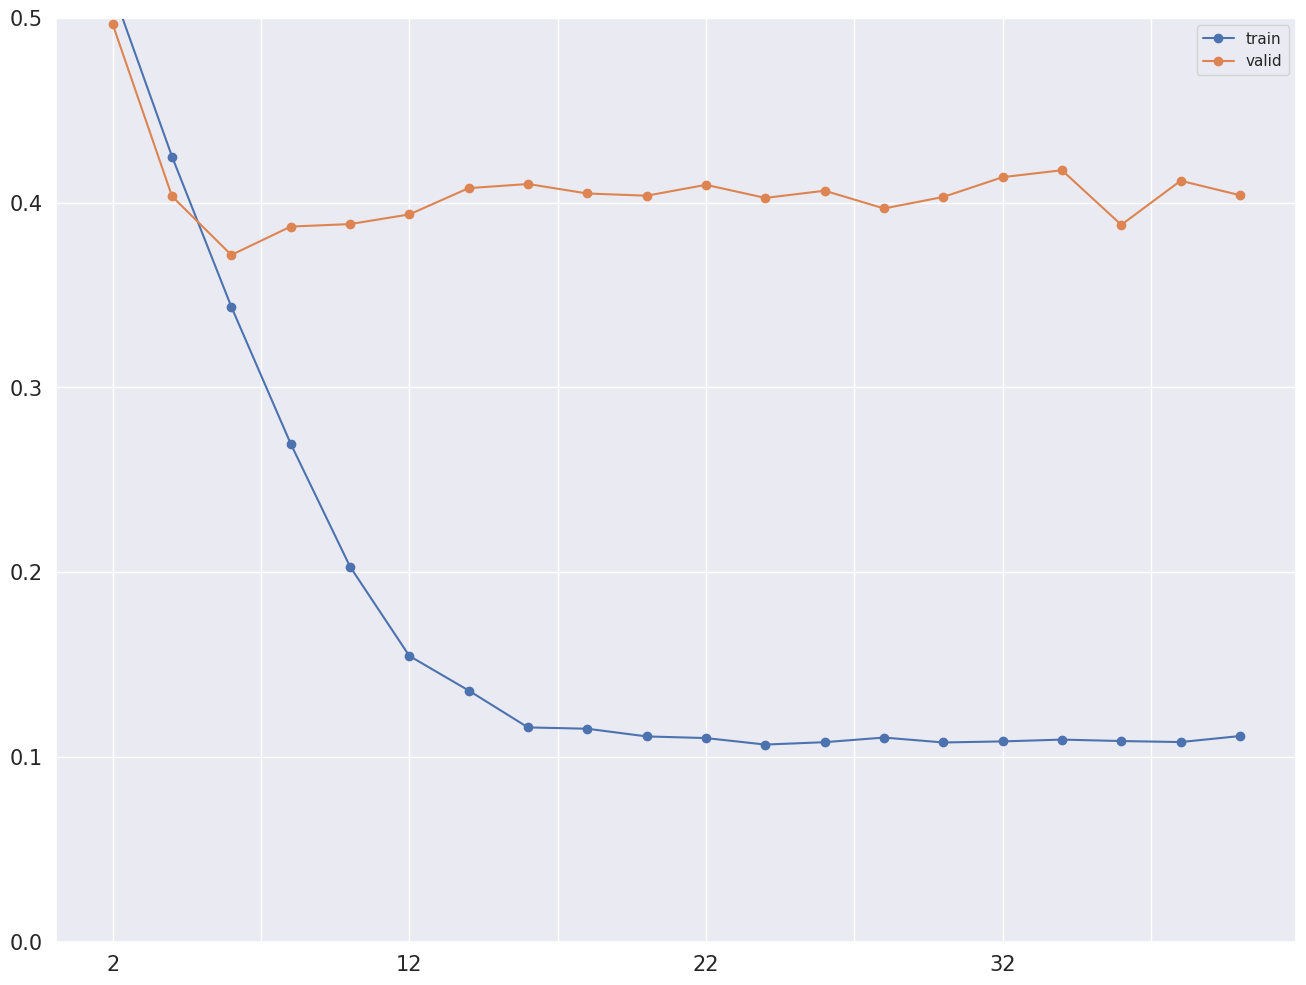

In [69]:
ax = res.plot.line(grid=True, fontsize=15, ylim=(0, 0.5), linestyle='-', style='o')

Ahora, calculamos el área bajo la ROC Curve sobre los mismos modelos


In [70]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["train", "valid"])
for depth in depths:
    learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
    learner.fit(X_train, y_train)
    res.loc[str(depth), "train"] = roc_auc_score(y_train, learner.predict_proba(X_train)[:, -1])
    res.loc[str(depth), "valid"] = roc_auc_score(y_valid, learner.predict_proba(X_valid)[:, -1])

In [71]:
res

,train,valid
2,0.86,0.93
4,0.89,0.94
6,0.93,0.94
8,0.97,0.92
10,0.99,0.92
...,...,...
32,1.00,0.89
34,1.00,0.89
36,1.00,0.90
38,1.00,0.89


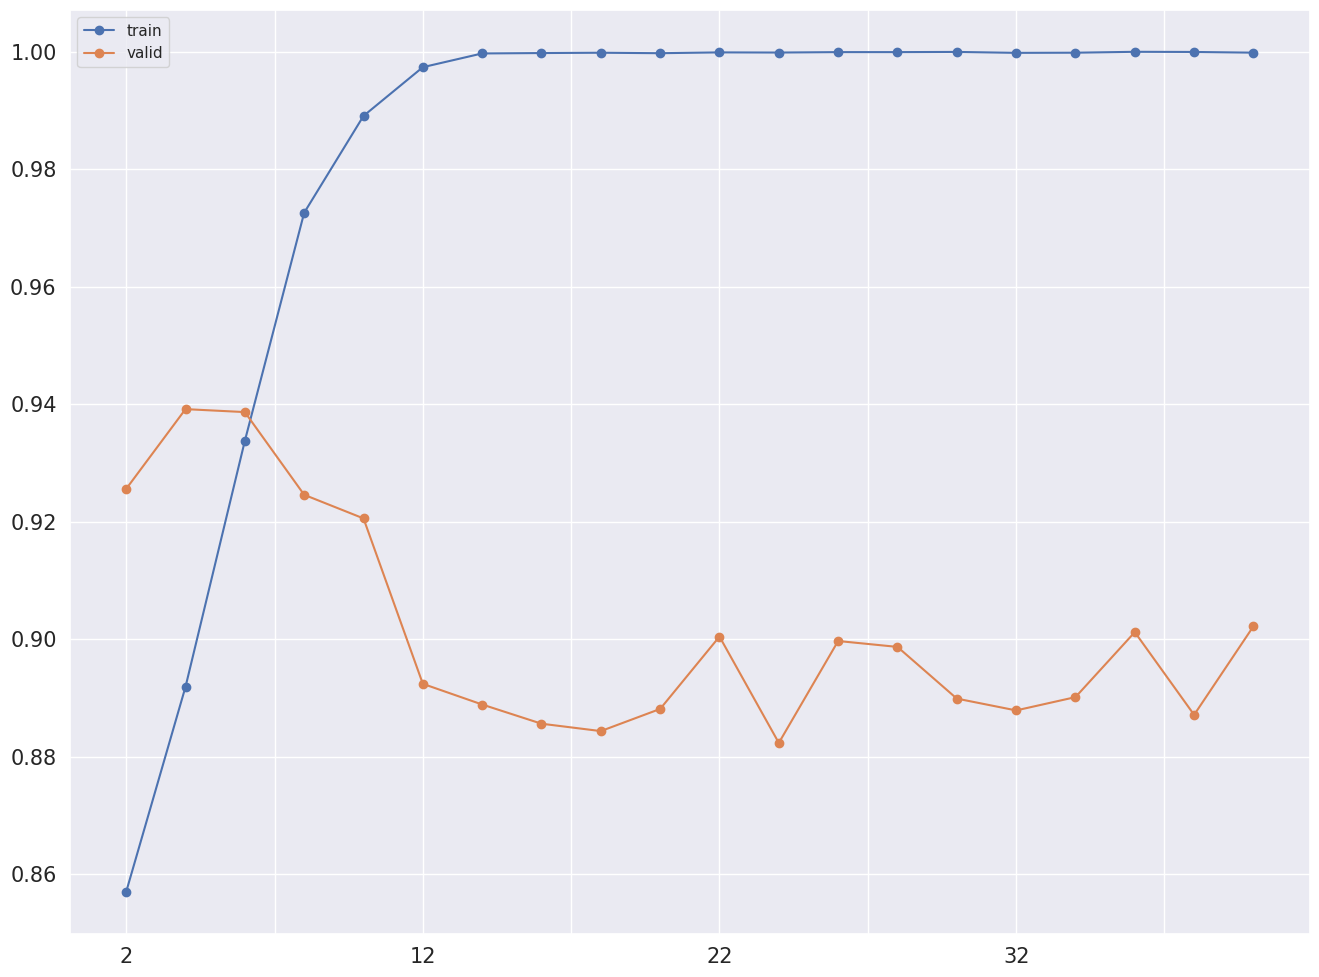

In [72]:
ax = res.plot.line(grid=True, fontsize=15, linestyle='-', style='o')

Veamos como es la supervivencia por deciles

In [73]:
# En Train
pd.crosstab(pd.cut(learner.predict_proba(X_train)[:, -1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]), y_train)

Survived,0,1
row_0,,
"(0.1, 0.2]",94,0
"(0.2, 0.3]",39,0
"(0.3, 0.4]",10,0
"(0.5, 0.6]",0,4
"(0.6, 0.7]",1,32
"(0.7, 0.8]",0,53


In [74]:
# En Test
pd.crosstab(pd.cut(learner.predict_proba(X_valid)[:, -1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]), y_valid)

Survived,0,1
row_0,,
"(0.1, 0.2]",8,3
"(0.2, 0.3]",9,2
"(0.3, 0.4]",7,4
"(0.4, 0.5]",2,1
"(0.5, 0.6]",0,2
"(0.6, 0.7]",1,4
"(0.7, 0.8]",1,3


## Validación Cruzada en K conjuntos (K-fold cross validation)

Este método consiste en dividir el set de entrenamiento en K subconjuntos disyuntos, para luego iterativamente entrenar el algoritmo en k-1 partes y evaluar en la restante.

Scikit Learn también tiene funciones para hacer estas divisiones


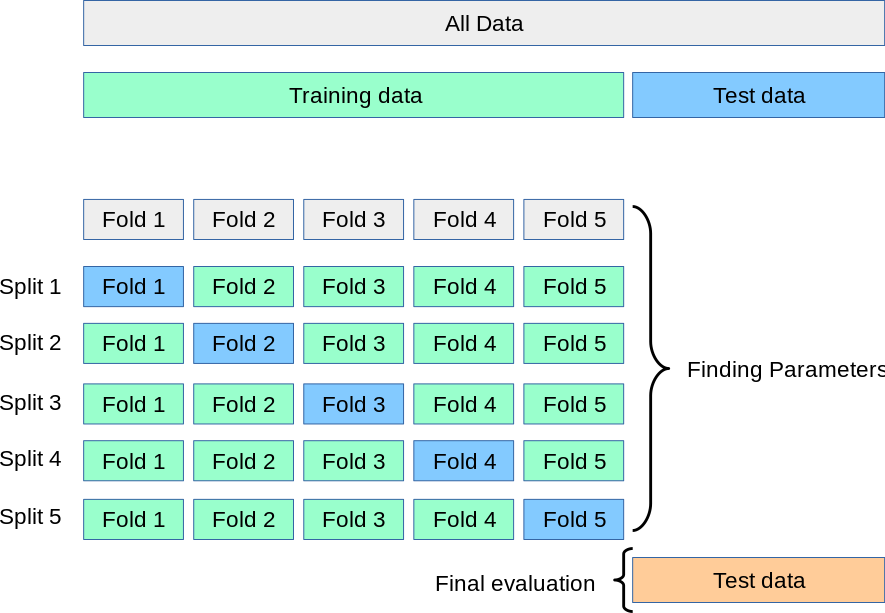

In [75]:
kf = model_selection.KFold(n_splits=5)
folds = [(data.iloc[train_idx].index, data.iloc[valid_idx].index) for train_idx, valid_idx in kf.split(data)]
folds[1]

(Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
            dtype='int64', name='PassengerId', length=713),
 Int64Index([180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
             ...
             348, 349, 350, 351, 352, 353, 354, 355, 356, 357],
            dtype='int64', name='PassengerId', length=178))

Vemos el tamaño de un Fold

In [76]:
folds[0][0].shape, folds[0][1].shape

((712,), (179,))

Ahora entrenamos iterando:
* Para cada uno de los parámetros a entrenar
* Para cada uno de los Folds

In [77]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["fold_" + str(i) for i in range(len(folds))] + ["valid"])

for depth in depths:
    valid_probs = []
    for i, (train_idx, valid_idx) in enumerate(folds):
        X_train = data.loc[train_idx]
        y_train = X_train.Survived
        X_train = X_train.drop("Survived", axis=1)

        X_valid = data.loc[valid_idx]
        y_valid = X_valid.Survived
        X_valid = X_valid.drop("Survived", axis=1)

        learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
        learner.fit(X_train, y_train)
        probs = pd.Series(learner.predict_proba(X_valid)[:, -1], index=X_valid.index)
        valid_probs.append(probs)
        res.loc[str(depth), "fold_" + str(i)] = roc_auc_score(y_valid.loc[probs.index], probs)
    valid_probs = pd.concat(valid_probs)
    res.loc[str(depth), "valid"] = roc_auc_score(data.loc[valid_probs.index, "Survived"], valid_probs)

In [78]:
res

,fold_0,fold_1,fold_2,fold_3,fold_4,valid
2,0.77,0.84,0.86,0.85,0.88,0.84
4,0.83,0.84,0.87,0.87,0.92,0.86
6,0.84,0.84,0.88,0.88,0.91,0.87
8,0.85,0.83,0.88,0.88,0.91,0.87
10,0.83,0.83,0.89,0.88,0.91,0.87
...,...,...,...,...,...,...
32,0.84,0.82,0.89,0.88,0.91,0.86
34,0.85,0.83,0.89,0.88,0.91,0.86
36,0.85,0.83,0.89,0.88,0.91,0.86
38,0.84,0.83,0.88,0.88,0.91,0.86


In [79]:
res.sort_values("valid", ascending=False)

,fold_0,fold_1,fold_2,fold_3,fold_4,valid
8,0.85,0.83,0.88,0.88,0.91,0.87
10,0.83,0.83,0.89,0.88,0.91,0.87
6,0.84,0.84,0.88,0.88,0.91,0.87
12,0.85,0.83,0.89,0.88,0.91,0.87
14,0.84,0.83,0.89,0.88,0.90,0.87
...,...,...,...,...,...,...
30,0.83,0.83,0.89,0.88,0.91,0.86
24,0.84,0.83,0.89,0.87,0.91,0.86
32,0.84,0.82,0.89,0.88,0.91,0.86
None,0.85,0.83,0.89,0.87,0.90,0.86


<Axes: >

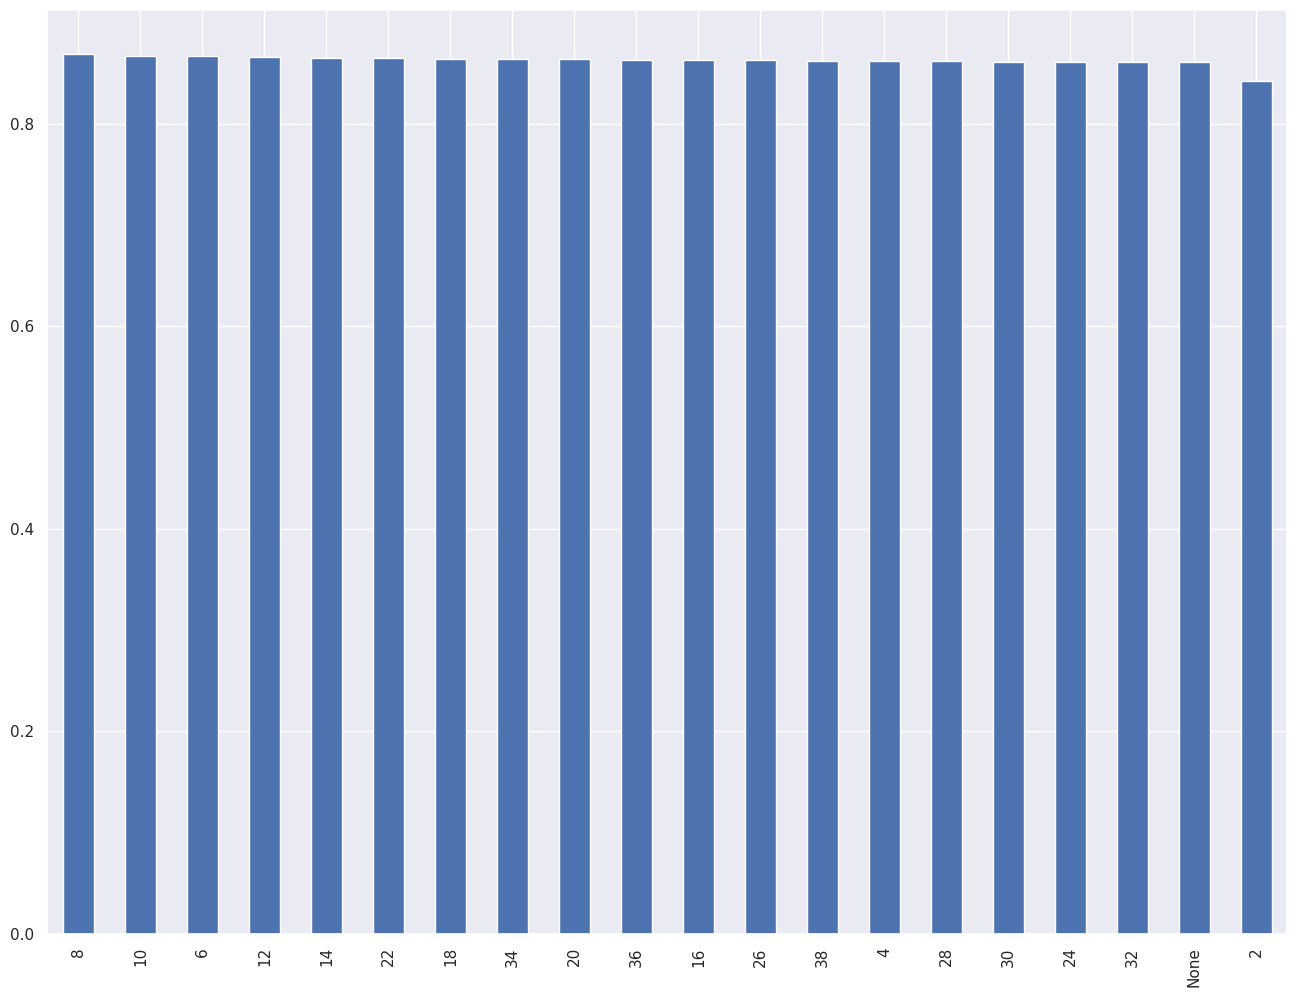

In [80]:
#diagrama de "pareto"
res.sort_values("valid", ascending=False).valid.plot.bar()

<Axes: >

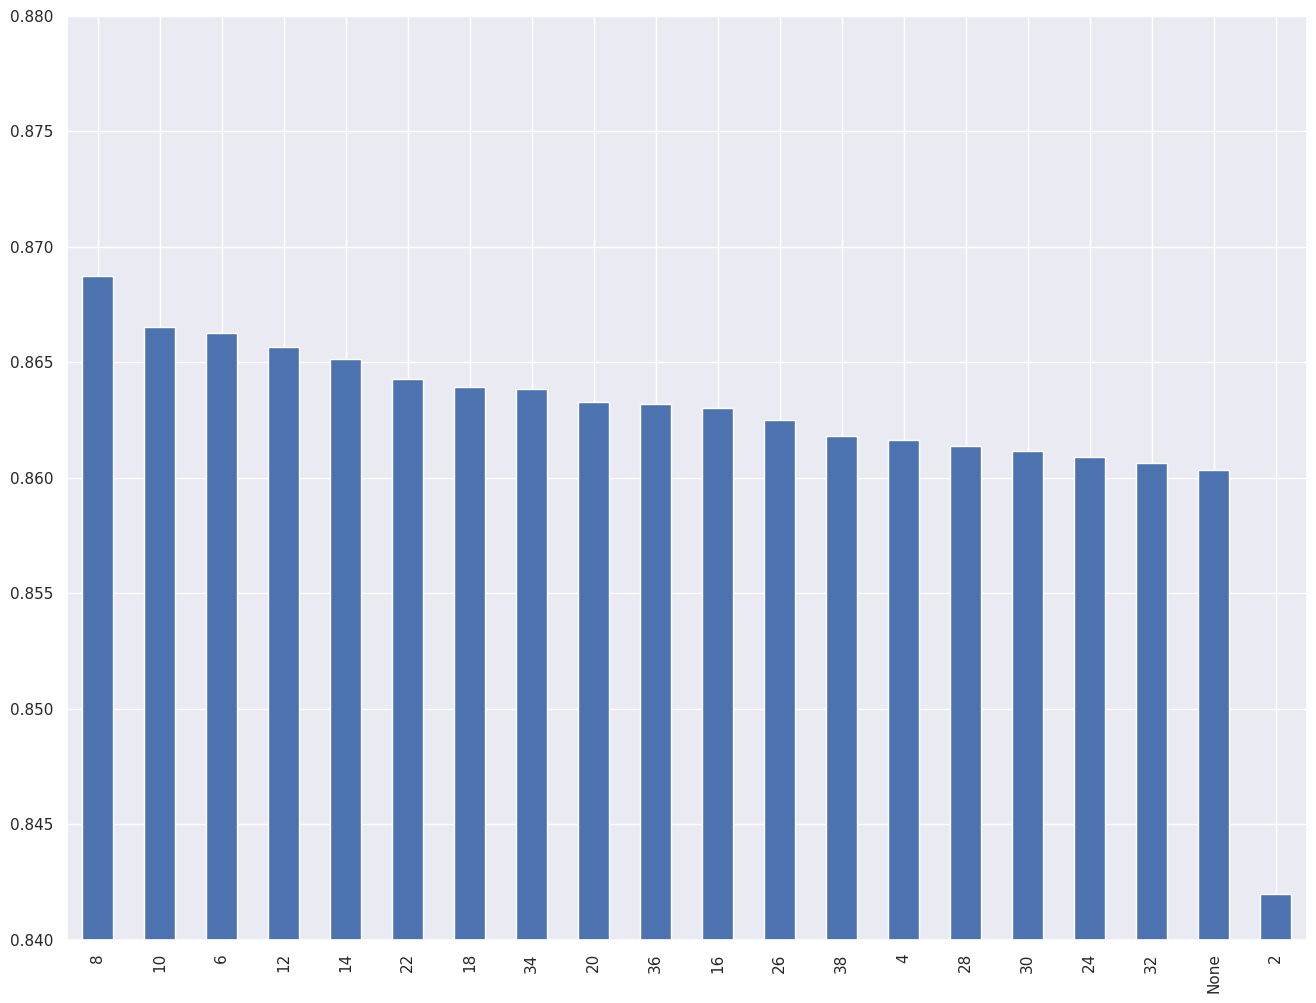

In [81]:
res.sort_values("valid", ascending=False).valid.plot.bar(ylim=(0.84, 0.88))

## Combinación de métodos  y determinación de cantidad de iteraciones

Ambos métodos se pueden combinar para hacer una estimación mas completa, con el beneficio agregado que, para algunso tipos de algoritmos, se puede facilitar la estimación de la cantidad de iteraciones (ej. boosting o redes neuronales)


In [ ]:
train, test = model_selection.train_test_split(data, test_size=0.1, random_state=0)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,,
816,0,1,0,0.00,0,0,634,-0.65,138,0,0,0,1,1
878,0,3,0,-0.82,0,0,671,-0.49,0,0,0,0,1,0
194,1,2,0,-2.05,1,1,137,-0.12,27,2,0,0,1,0
524,1,1,1,1.10,0,1,290,0.52,63,1,1,0,0,0
635,0,3,1,-1.59,3,2,62,-0.09,0,5,0,0,1,0


In [ ]:
kf = model_selection.KFold(n_splits=5)
folds = [(train.iloc[train_idx].index, train.iloc[valid_idx].index) for train_idx, valid_idx in kf.split(train)]
folds[0]

(Int64Index([334, 699, 482,  72,  50, 574, 339, 262, 117,  77,
             ...
             724,  10, 360, 708, 764, 836, 193, 630, 560, 685],
            dtype='int64', name='PassengerId', length=640),
 Int64Index([816, 878, 194, 524, 635, 532, 248, 267, 695, 682,
             ...
             821, 383,  21, 586,  66, 681, 879, 305, 824, 522],
            dtype='int64', name='PassengerId', length=161))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
depths = list(range(2, 40, 2))
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["fold_" + str(i) for i in range(len(folds))] + ["valid", "test"])

for depth in depths:
    valid_probs = []
    test_probs = []
    for i, (train_idx, valid_idx) in enumerate(folds):
        X_train = train.loc[train_idx]
        y_train = X_train.Survived
        X_train = X_train.drop("Survived", axis=1)

        X_valid = train.loc[valid_idx]
        y_valid = X_valid.Survived
        X_valid = X_valid.drop("Survived", axis=1)

        learner = XGBClassifier(n_estimators=10000, max_depth=depth, eval_metric="auc", early_stopping_rounds=10)
        learner.fit(X_train, y_train,
                    eval_set=[(X_train, y_train),
                              (test.drop("Survived", axis=1), test.Survived),
                              (X_valid, y_valid)])
        probs = pd.Series(learner.predict_proba(X_valid)[:, -1], index=X_valid.index)
        valid_probs.append(probs)
        res.loc[str(depth), "fold_" + str(i)] = roc_auc_score(y_valid.loc[probs.index], probs)
        probs = pd.Series(learner.predict_proba(test.drop("Survived", axis=1))[:, -1], index=test.index, name="fold_" + str(i))
        test_probs.append(probs)
    valid_probs = pd.concat(valid_probs)
    res.loc[str(depth), "valid"] = roc_auc_score(train.loc[valid_probs.index, "Survived"], valid_probs)
    test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
    res.loc[str(depth), "test"] = roc_auc_score(test.loc[test_probs.index, "Survived"], test_probs)

[0]	validation_0-auc:0.81488	validation_1-auc:0.83032	validation_2-auc:0.83122
[1]	validation_0-auc:0.84706	validation_1-auc:0.92308	validation_2-auc:0.84025
[2]	validation_0-auc:0.84597	validation_1-auc:0.92534	validation_2-auc:0.84362
[3]	validation_0-auc:0.84860	validation_1-auc:0.92132	validation_2-auc:0.84379
[4]	validation_0-auc:0.85204	validation_1-auc:0.94067	validation_2-auc:0.84539
[5]	validation_0-auc:0.86192	validation_1-auc:0.94771	validation_2-auc:0.84784
[6]	validation_0-auc:0.86681	validation_1-auc:0.94495	validation_2-auc:0.84919
[7]	validation_0-auc:0.86745	validation_1-auc:0.94997	validation_2-auc:0.84885
[8]	validation_0-auc:0.87077	validation_1-auc:0.95249	validation_2-auc:0.86572
[9]	validation_0-auc:0.87429	validation_1-auc:0.95425	validation_2-auc:0.87045
[10]	validation_0-auc:0.87712	validation_1-auc:0.95551	validation_2-auc:0.86707
[11]	validation_0-auc:0.88237	validation_1-auc:0.95349	validation_2-auc:0.86682
[12]	validation_0-auc:0.88256	validation_1-auc:0.9

In [ ]:
res

,fold_0,fold_1,fold_2,fold_3,fold_4,valid,test
2,0.87,0.84,0.88,0.86,0.89,0.86,0.96
4,0.88,0.85,0.89,0.86,0.88,0.86,0.94
6,0.91,0.83,0.91,0.82,0.87,0.86,0.93
8,0.91,0.84,0.91,0.83,0.86,0.86,0.91
10,0.91,0.84,0.90,0.84,0.87,0.86,0.91
...,...,...,...,...,...,...,...
30,0.90,0.84,0.90,0.84,0.86,0.85,0.90
32,0.90,0.84,0.90,0.84,0.86,0.85,0.90
34,0.90,0.84,0.90,0.84,0.86,0.85,0.90
36,0.90,0.84,0.90,0.84,0.86,0.85,0.90


In [ ]:
res.sort_values("test", ascending=False)

,fold_0,fold_1,fold_2,fold_3,fold_4,valid,test
2,0.87,0.84,0.88,0.86,0.89,0.86,0.96
4,0.88,0.85,0.89,0.86,0.88,0.86,0.94
6,0.91,0.83,0.91,0.82,0.87,0.86,0.93
8,0.91,0.84,0.91,0.83,0.86,0.86,0.91
12,0.90,0.83,0.90,0.82,0.87,0.85,0.91
...,...,...,...,...,...,...,...
24,0.90,0.84,0.90,0.84,0.86,0.85,0.90
22,0.90,0.84,0.90,0.84,0.86,0.85,0.90
18,0.90,0.84,0.90,0.84,0.86,0.85,0.90
38,0.90,0.84,0.90,0.84,0.86,0.85,0.90


<Axes: >

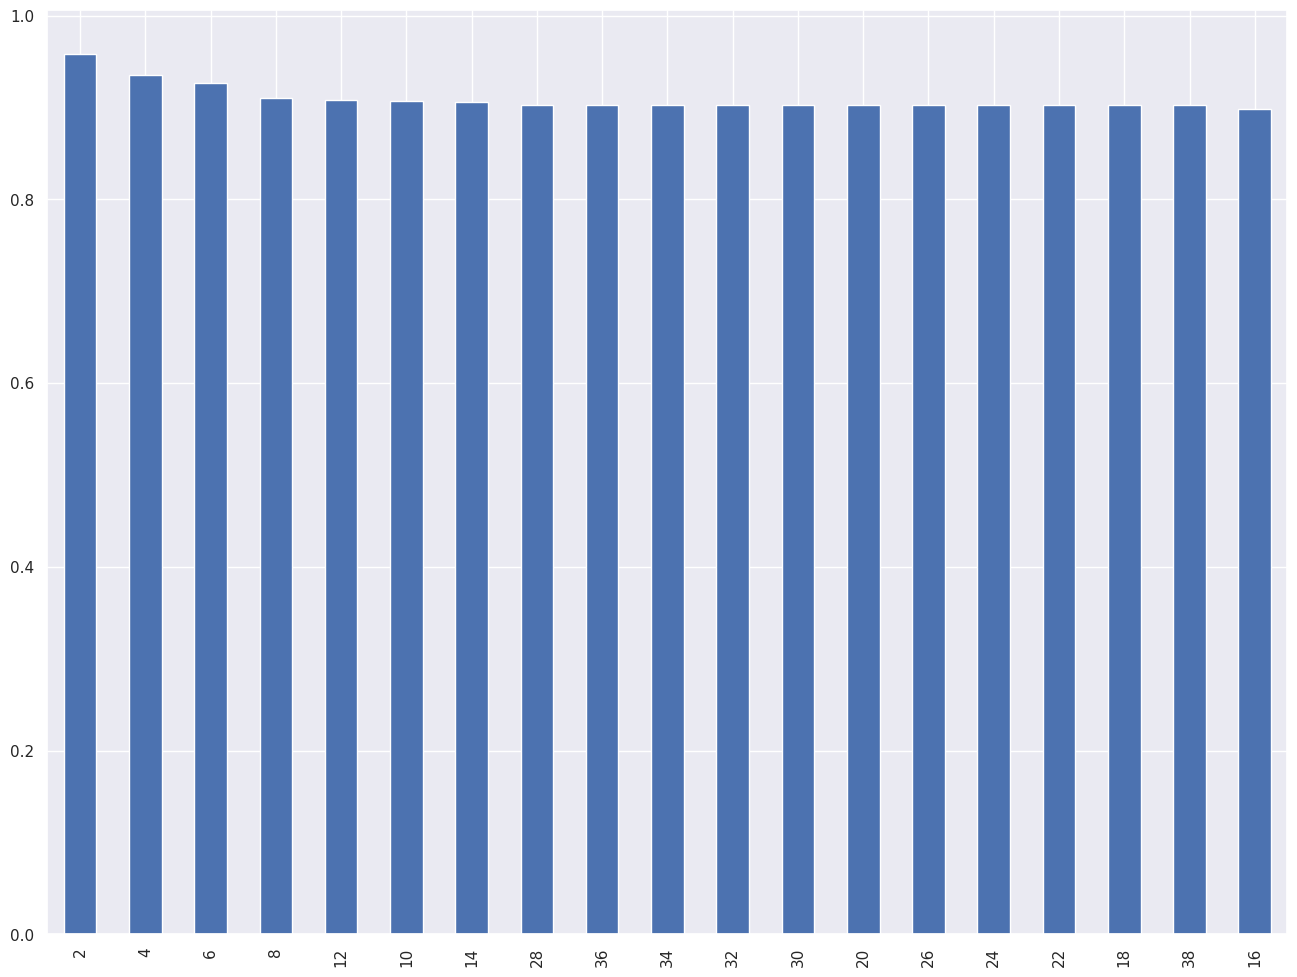

In [ ]:
res.sort_values("test", ascending=False).test.plot.bar()

<Axes: >

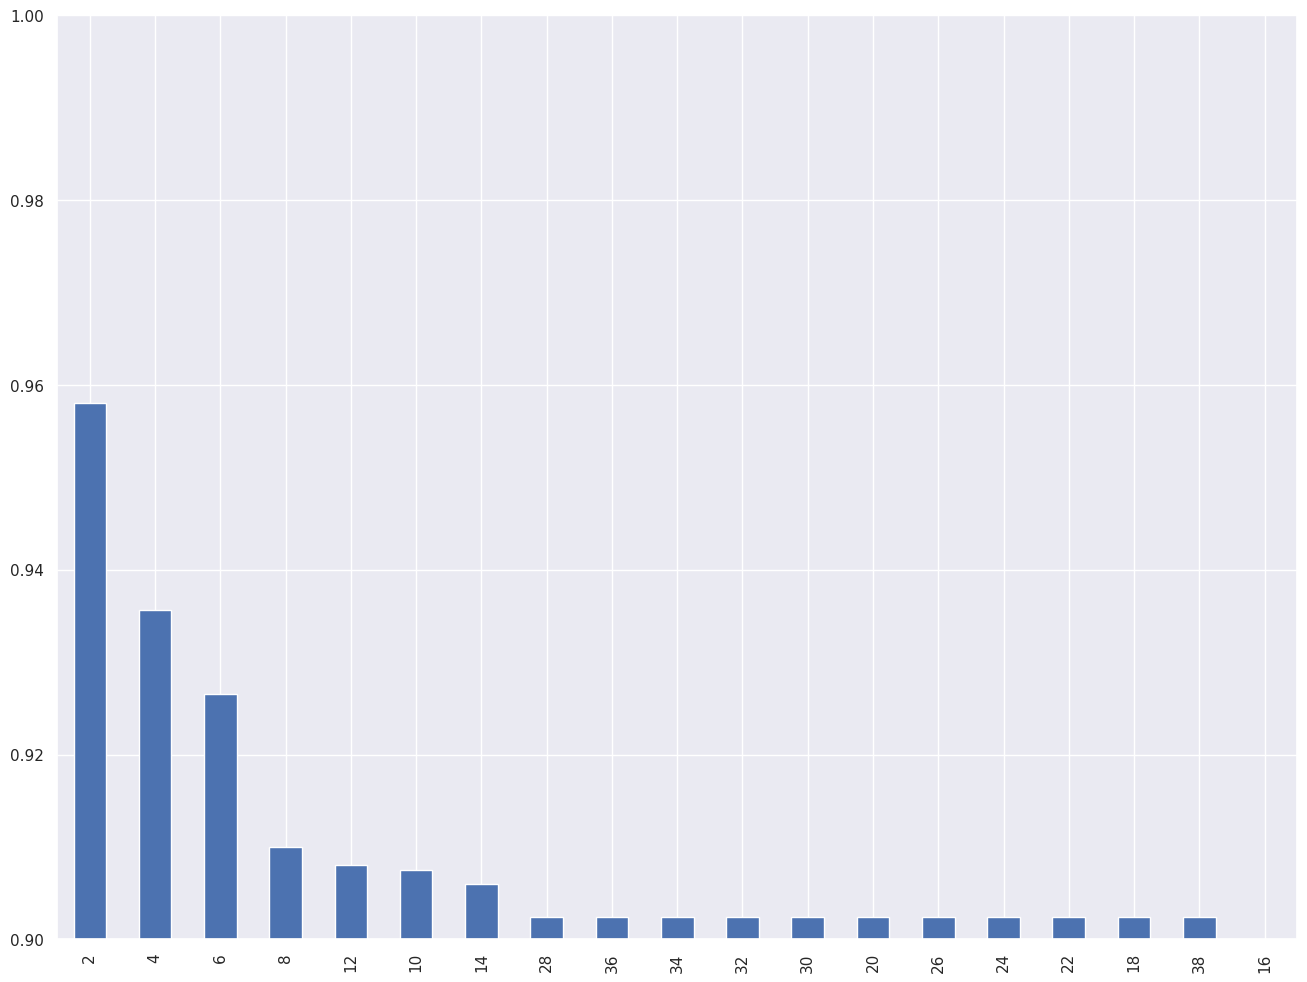

In [ ]:
res.sort_values("test", ascending=False).test.plot.bar(ylim=(0.9, 1))

<Axes: >

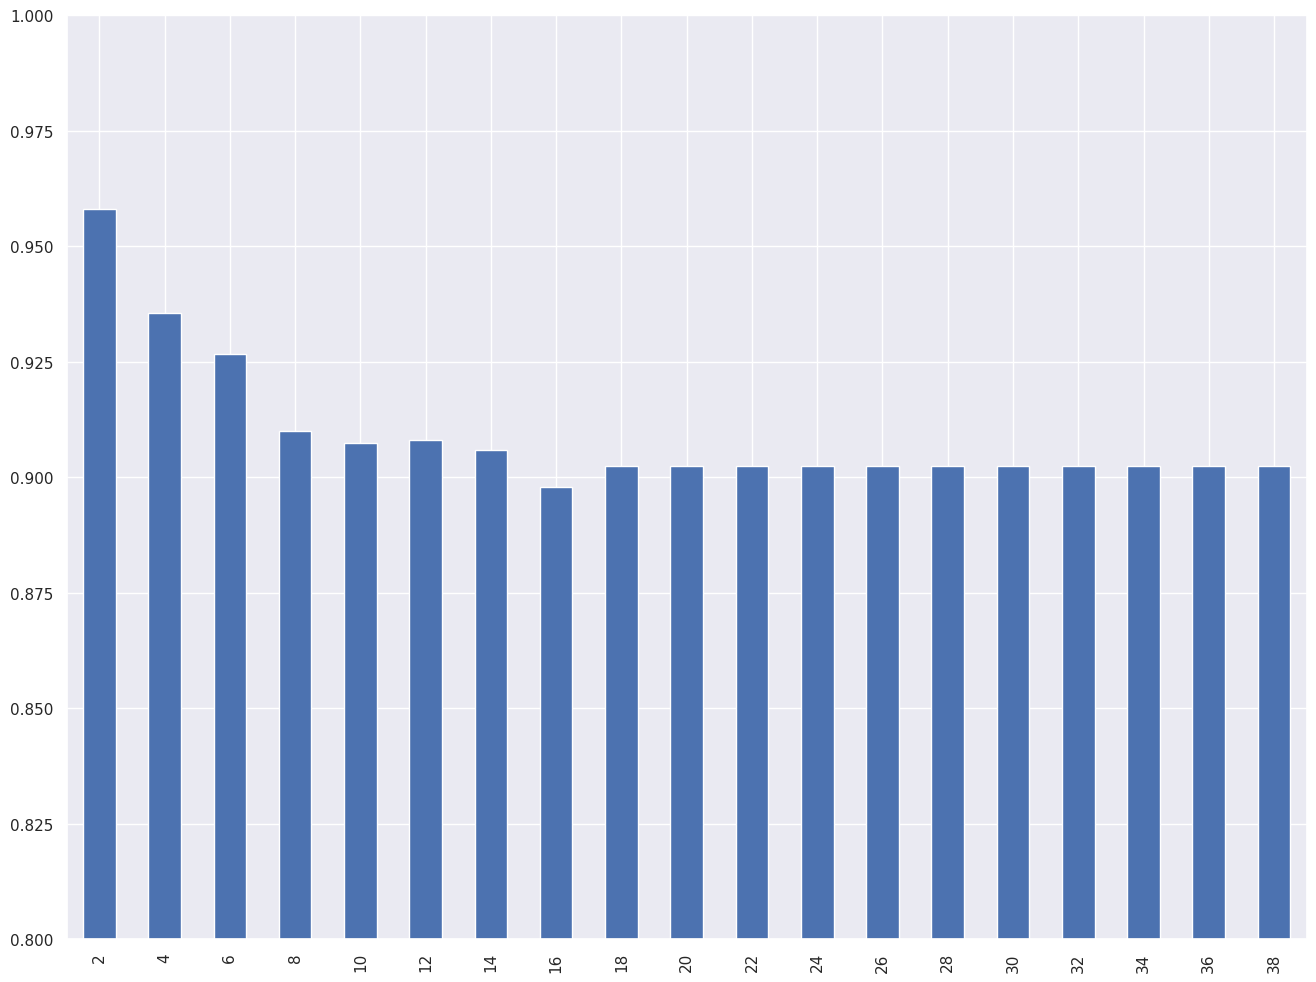

In [ ]:
res.test.plot.bar(ylim=(0.8, 1))

# Ejercitación



1.   Tomar los Datos Procesados de Titanic de la clase pasada
2.   Hacer una separación 80/20 en Train y Test
3.   Para la parte de Train, armar un esquema de CV con 5 Folds
4.   Entrenar un modelo de Random Forest, optimizando un parámetro al elección
5.   Evaluar cual es el máximo Area bajo la Curva ROC que se obtiene